In [1]:
# Claudio Iturra, 2021
# Eumetsat Lab, Germany!

from datetime import timedelta as delta

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import math

from datetime import timedelta
from datetime import timedelta as delta
from operator import attrgetter
import os
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore',category=UserWarning)

from parcels import (
    AdvectionRK4,
    FieldSet,
    JITParticle,
    ParticleFile,
    ParticleSet,
    Variable,
    download_example_dataset,
)

import trajan as ta
from datetime import timedelta as delta
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.pyplot as plt
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import matplotlib.animation as animation

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore',category=UserWarning)

In [3]:
import xarray as xr
dsX = xr.open_mfdataset('/home/cl/Documents/NorSIM/SIM200501Skagerrak.nc4')

In [4]:
dsX

<xarray.Dataset> Size: 16MB
Dimensions:     (time: 78, depth: 1, lat: 126, lon: 101)
Coordinates:
  * time        (time) datetime64[ns] 624B 2005-01-01 ... 2005-01-10T21:00:00
  * depth       (depth) float64 8B 2.0
  * lat         (lat) float64 1kB 55.0 55.04 55.08 55.12 ... 59.92 59.96 60.0
  * lon         (lon) float64 808B 4.96 5.04 5.12 5.2 ... 12.72 12.8 12.88 12.96
Data variables:
    salinity    (time, depth, lat, lon) float32 4MB dask.array<chunksize=(10, 1, 126, 101), meta=np.ndarray>
    water_temp  (time, depth, lat, lon) float32 4MB dask.array<chunksize=(10, 1, 126, 101), meta=np.ndarray>
    water_u     (time, depth, lat, lon) float32 4MB dask.array<chunksize=(10, 1, 126, 101), meta=np.ndarray>
    water_v     (time, depth, lat, lon) float32 4MB dask.array<chunksize=(10, 1, 126, 101), meta=np.ndarray>
Attributes: (12/14)
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Naval Oceanographic Office
    source:                    HYCOM archive file
    ...                        ...
    Conventions:               CF-1.6 NAVO_netcdf_v1.1
    History:                   Translated to CF-1.0 Conventions by Netcdf-Jav...
    geospatial_lat_min:        55.0
    geospatial_lat_max:        60.0
    geospatial_lon_min:        4.9599609375
    geospatial_lon_max:        12.9599609375

In [47]:
LON,LAT = np.meshgrid(dsX['lon'].values,dsX['lat'].values)

In [92]:
min_lat, max_lat = 56, 59
min_lon, max_lon = 7, 12

mask = (LAT >= min_lat) & (LAT <= max_lat) & \
       (LON >= min_lon) & (LON <= max_lon)

LATX = LAT[mask]
LONX = LON[mask]

print(LATX)
print(LONX)

[56. 56. 56. ... 59. 59. 59.]
[ 7.04003906  7.11999512  7.19995117 ... 11.83996582 11.92004395
 12.        ]


In [93]:
lon = LONX[::20]
lat = LATX[::20]

In [94]:
#lon = [-73.76, -73.76, -73.76, -73.68, -73.76, -73.68, -73.6, -73.52, -73.44, -73.36, -73.28, -73.2, -73.76, -73.68, -73.6, -73.44, -73.36, -73.28, -73.2, -73.76, -73.68, -73.6, -73.44, -73.36, -73.28, -73.2, -73.76, -73.68, -73.6, -73.52, -73.44, -73.36, -73.28, -73.2, -73.76, -73.68, -73.6, -73.52, -73.44, -73.36, -73.28, -73.76, -73.68, -73.6, -73.52, -73.44, -73.36, -73.28, -73.2, -73.76, -73.68, -73.6, -73.52, -73.44, -73.36, -73.28, -73.2, -73.04, -73.76, -73.68, -73.6, -73.52, -73.44, -73.36, -73.28, -73.2, -73.12, -73.04, -73.76, -73.68, -73.6, -73.52, -73.44, -73.36, -73.28, -73.2, -73.12, -73.04, -72.96, -73.76, -73.68, -73.6, -73.52, -73.44, -73.36, -73.28, -73.2, -73.12, -73.04, -72.96, -73.76, -73.68, -73.6, -73.52, -73.44, -73.36, -73.28, -73.2, -73.12, -73.04, -72.96, -72.88, -73.76, -73.68, -73.6, -73.52, -73.44, -73.36, -73.28, -73.2, -73.12, -73.04, -72.96, -72.88]
#lat = [-37.36, -37.28, -37.2, -37.2, -37.12, -37.12, -37.12, -37.12, -37.12, -37.12, -37.12, -37.12, -37.04, -37.04, -37.04, -37.04, -37.04, -37.04, -37.04, -36.96, -36.96, -36.96, -36.96, -36.96, -36.96, -36.96, -36.88, -36.88, -36.88, -36.88, -36.88, -36.88, -36.88, -36.88, -36.8, -36.8, -36.8, -36.8, -36.8, -36.8, -36.8, -36.72, -36.72, -36.72, -36.72, -36.72, -36.72, -36.72, -36.72, -36.64, -36.64, -36.64, -36.64, -36.64, -36.64, -36.64, -36.64, -36.64, -36.56, -36.56, -36.56, -36.56, -36.56, -36.56, -36.56, -36.56, -36.56, -36.56, -36.48, -36.48, -36.48, -36.48, -36.48, -36.48, -36.48, -36.48, -36.48, -36.48, -36.48, -36.4, -36.4, -36.4, -36.4, -36.4, -36.4, -36.4, -36.4, -36.4, -36.4, -36.4, -36.32, -36.32, -36.32, -36.32, -36.32, -36.32, -36.32, -36.32, -36.32, -36.32, -36.32, -36.32, -36.24, -36.24, -36.24, -36.24, -36.24, -36.24, -36.24, -36.24, -36.24, -36.24, -36.24, -36.24]
#lon = [9.28]
#lat = [58]

In [95]:
# Names of the velocity component data in the file
variables = {
    'U': 'water_u',
    'V': 'water_v'
}

# Names of the dimensions in the file
dimensions = {
    'lat': 'lat',
    'lon': 'lon',
    'time': 'time',
    'depth': 'depth'
}

In [96]:
ds = dsX.sel(time=slice('2005-01-01T00:00:00.000000000','2005-01-10T00:00:00.000000000'))
fieldset = FieldSet.from_xarray_dataset(ds, variables, dimensions,vmin=-2000,allow_time_extrapolation=True)
pset = ParticleSet(fieldset=fieldset, pclass=JITParticle, lon=lon, lat=lat)#, repeatdt=repeatdt)


def DeleteParticle(particle,fieldset,time):
    particle.delete()

#Running the model

output_file = pset.ParticleFile(name="HYCOM.zarr", outputdt=timedelta(hours=1))

kernels = pset.Kernel(AdvectionRK4)
pset.execute(kernels,
             runtime=delta(days=5),
             dt=delta(hours=1),
             output_file=output_file)
             #recovery={ErrorCode.ErrorOutOfBounds: DeleteParticle})

INFO: Output files are stored in HYCOM.zarr.

  0%|                                              | 0/432000.0 [00:00<?, ?it/s]
  6%|█▋                          | 25200.0/432000.0 [00:00<00:01, 232777.24it/s]
 14%|███▉                        | 61200.0/432000.0 [00:00<00:01, 293294.63it/s]
 22%|██████                      | 93600.0/432000.0 [00:00<00:01, 304188.30it/s]
 29%|███████▉                   | 126000.0/432000.0 [00:00<00:00, 310994.24it/s]
 37%|█████████▉                 | 158400.0/432000.0 [00:00<00:00, 315222.56it/s]
 44%|███████████▉               | 190800.0/432000.0 [00:00<00:00, 310542.55it/s]
 52%|█████████████▉             | 223200.0/432000.0 [00:00<00:00, 308828.18it/s]
 59%|███████████████▉           | 255600.0/432000.0 [00:00<00:00, 308952.17it/s]
 67%|██████████████████         | 288000.0/432000.0 [00:00<00:00, 306433.45it/s]
 74%|████████████████████       | 320400.0/432000.0 [00:01<00:00, 304619.26it/s]
 82%|██████████████████████     | 352800.0/432000.0 [00:01<00:0

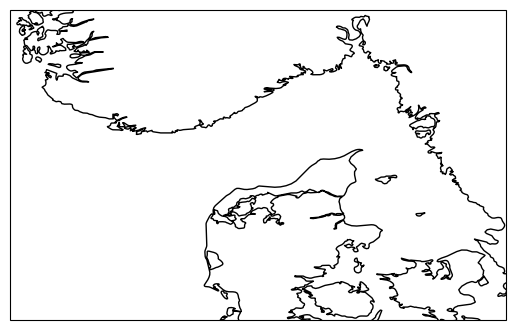

In [97]:
dz = xr.open_zarr("HYCOM.zarr")
idx = len(dz.lat)

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add coastline features
ax.coastlines()
ax.set_extent([np.min(dsX['lon'].values), np.max(dsX['lon'].values), np.min(dsX['lat'].values), np.max(dsX['lat'].values)])

Text(0.5, 1.0, 'LAGRANGIAN TRAJECTORIES 200501-01-10')

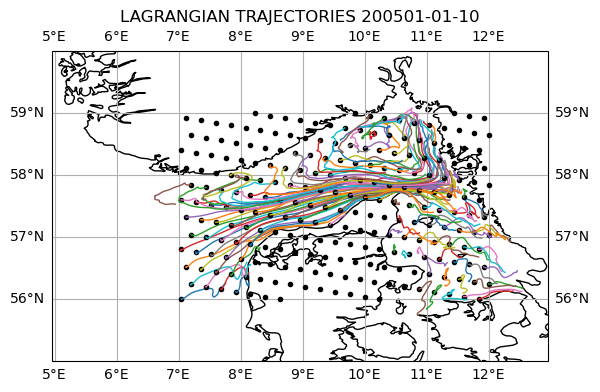

In [124]:
dz = xr.open_zarr("HYCOM.zarr")
idx = len(dz.lat)

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add coastline features
ax.coastlines()
ax.set_extent([np.min(dsX['lon'].values), np.max(dsX['lon'].values), np.min(dsX['lat'].values), np.max(dsX['lat'].values)])

ax.gridlines(draw_labels=True)
for x in range(0,idx):
    plt.plot(dz.lon[x,0],dz.lat[x,0], marker='.',color = 'k')
    plt.plot(dz.lon[x][0:360],dz.lat[x][0:360],linewidth = '1')

plt.title('LAGRANGIAN TRAJECTORIES 200501-01-10')

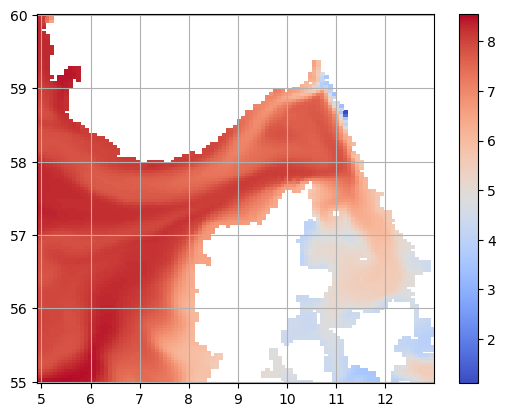

In [120]:
temp = np.squeeze(dsX['water_temp'], axis=1)
plt.pcolor(LON,LAT,np.nanmean(temp, axis = 0), cmap = 'coolwarm')
plt.colorbar()
plt.grid()
plt.title('TEMP 200501-01-10')

Text(0.5, 1.0, 'STD TEMP 200501-01-10')

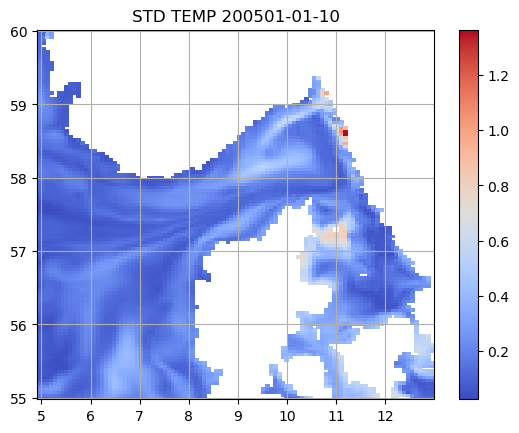

In [126]:
temp = np.squeeze(dsX['water_temp'], axis=1)
plt.pcolor(LON,LAT,np.std(temp, axis = 0), cmap = 'coolwarm')
plt.colorbar()
plt.grid()
plt.title('STD TEMP 200501-01-10')

Text(0.5, 1.0, 'SAL 200501-01-10')

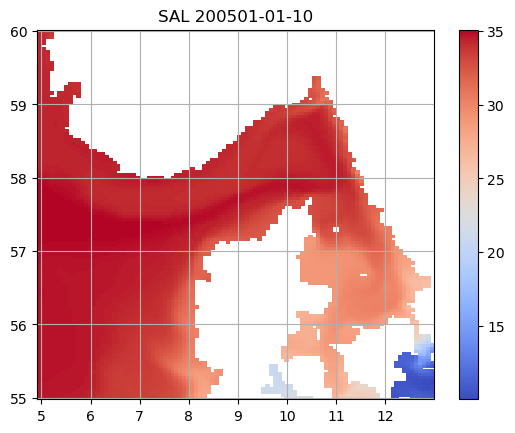

In [123]:
sal = np.squeeze(dsX['salinity'], axis=1)
plt.pcolor(LON,LAT,np.nanmean(sal, axis = 0), cmap = 'coolwarm')
plt.colorbar()
plt.grid()
plt.title('SAL 200501-01-10')

Text(0.5, 1.0, 'SAL 200501-01-10')

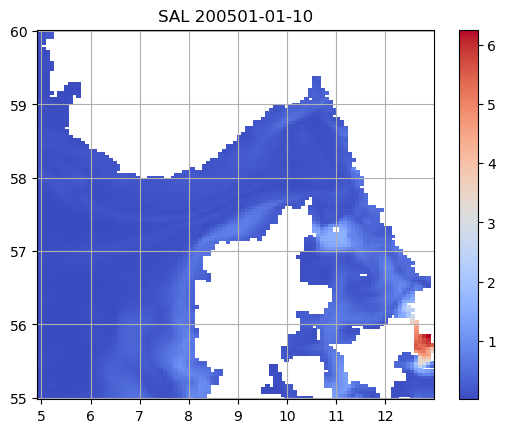

In [128]:
sal = np.squeeze(dsX['salinity'], axis=1)
plt.pcolor(LON,LAT,np.nanstd(sal, axis = 0), cmap = 'coolwarm')
plt.colorbar()
plt.grid()
plt.title('SAL 200501-01-10')

Particles tracking - Particles and particle sets EXPERIMENTS
Coastal pollution and impacts

